In [48]:
import pandas as pd
import re
from collections import Counter
import json

In [49]:
example_dataset = pd.read_excel("data.xlsx", sheet_name="Example dataset")
categories = pd.read_excel("data.xlsx", sheet_name="Categories", header=None)

In [50]:
def extract_category(category):
    pattern1 = re.compile("Books on ([-a-zA-Z ]+)")
    pattern2 = re.compile("Books about ([-a-zA-Z ]+)")
    pattern3 = re.compile("([-a-zA-Z ]+) Books")

    match1 = pattern1.match(category)
    match2 = pattern2.match(category)
    match3 = pattern3.match(category)

    if match1:
        return match1.group(1)
    elif match2:
        return match2.group(1)
    elif match3:
        return match3.group(1)
    else:
        print(f"Bad category: {category}")
        return category

In [51]:
def parse_list_of_categories(text):
    if not isinstance(text, str):
        return []
    lst = re.split(r"[,\n]", text)
    categories_list = list(map(lambda x:x.strip(), lst))
    return categories_list

def transform_list_of_categories(categories_list):
    extracted_category_list = []
    for category in categories_list:
        new_category = extract_category(category)
        extracted_category_list.append(new_category)
    return extracted_category_list

def get_list_of_categories(text):
    return transform_list_of_categories(parse_list_of_categories(text))

In [52]:
data = {
    "name": [],
    "categories": [],
}
for i, value in example_dataset.iterrows():
    lst = get_list_of_categories(value["Categories"])
    if lst:
        data["name"].append(value["Title"])
        data["categories"].append(json.dumps(lst))

Bad category: Books by David Foster Wallace
Bad category: Books Based on True Stories
Bad category: Children's Behavior
Bad category: Books on 9/11


In [53]:
import os

if not os.path.exists("save"):
    os.mkdir("save")

pd.DataFrame(data).to_csv("save/data.csv", index=False)

In [54]:
category_counter = Counter()
df = pd.read_csv("save/data.csv")
for i, row in df.iterrows():
    new_categories = json.loads(row["categories"])
    for category in new_categories:
        category_counter[category] += 1

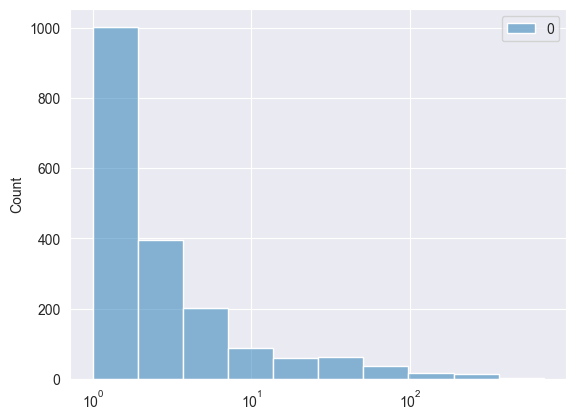

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(category_counter.values(), bins=10, log_scale=True)
plt.show()

In [56]:
len(category_counter)

1882